In [16]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


In [17]:

df = pd.read_csv("UnempUpdated.csv")
df = df.rename(columns={"Year ":"Year"})
# DC, Los Angeles County, and New York City is included, drop these rows
drop = df[df["State and area"] != "Los Angeles County"]
drop = drop[drop["State and area"] != "New York city"]
df = drop[drop["State and area"] != "District of Columbia"]


In [18]:
def pred_by_state_andYr(state,year):
    newDf = df[df["State and area"] == state]
    X = newDf[newDf["Year"] != year].values
    y = newDf[newDf["Year"] == year].values
    
    x_features = X[:,2:9]
    x_target = X[:,9]
    y_features = y[:,2:9]
    y_target = y[:,9]
    x_target = np.array(x_target).reshape(-1,1)
    y_target = np.array(y_target).reshape(-1,1)
    

    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(x_features)
    y = sc_y.fit_transform(x_target)
    y2 = sc_y.fit_transform(y_target)
    x2 = sc_X.fit_transform(y_features)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    regressor = SVR(kernel = 'rbf',C = 1, gamma = 0.1, epsilon = 0.1)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(x2)
    y_pred = sc_y.inverse_transform(y_pred)
    plt.plot(y_features[:,0],y_pred,label = "Predicted")
    plt.plot(y_features[:,0],y_target,label="Actual")
    plt.legend()
    plt.xlabel("Month")
    plt.ylabel("Unemployment Rate")
    plt.xticks(np.arange(1, 13, step=1))
    plt.title("Pred vs Actual Unemployment Rate in " + state + " " + str(year))
    plt.show()
    parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

   
    
    return tuple((y_pred,sc_y.inverse_transform(y2)))
    

/Users/KelvinM/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/KelvinM/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


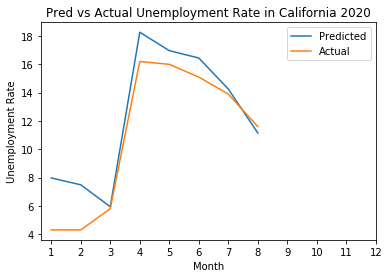

3.877505749537569

In [19]:
value = pred_by_state_andYr("California",2020)
mean_squared_error(value[1],value[0])


In [24]:
def graph_2020impact(state):
    newDf = df[df["State and area"] == state]
    X = newDf[newDf["Year"] != 2020].values
    y = newDf[newDf["Year"] == 2020].values
    x_features = X[:,2:9]
    x_target = X[:,9]
    y_features = y[:,2:9]
    y_target = y[:,9]
    
    neigh = KNeighborsRegressor(n_neighbors=1)
    neigh.fit(x_features,x_target)
    prediction = neigh.predict(y_features)
    plt.plot(y_features[:,0],prediction,label = "Predicted")
    plt.plot(y_features[:,0],y_target,label="Actual")
    plt.legend()
    plt.xlabel("Month")
    plt.ylabel("Unemployment Rate")
    plt.title("Impact of Covid in " + state +  " Unemployment Rate")
    plt.show()
    print()
    return "Mean Squared Error: " + str(mean_squared_error(prediction,y_target))

from ipywidgets import *
df = pd.read_csv("UnempUpdated.csv")
df = df.rename(columns={"Year ":"Year"})
# DC, Los Angeles County, and New York City is included, drop these rows
drop = df[df["State and area"] != "Los Angeles County"]
drop = drop[drop["State and area"] != "New York city"]
df = drop[drop["State and area"] != "District of Columbia"]
stateArray = df["State and area"]
stateArray = stateArray[0:50]


slider = interact(graph_2020impact,state =(stateArray))   

A Jupyter Widget

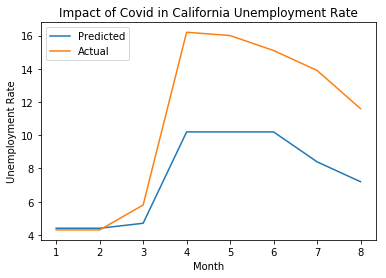

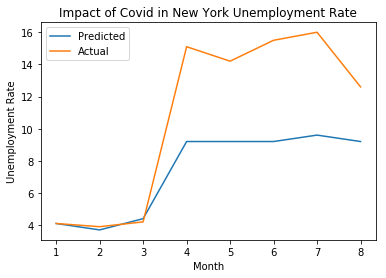

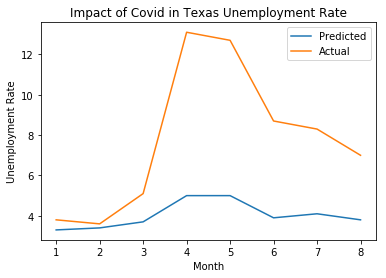

In [15]:
cali = graph_2020impact("California")
ny = graph_2020impact("New York")
tx = graph_2020impact("Texas")
cali_df = pd.DataFrame({"predicted":cali[0],"actual":cali[1]})
ny_df = pd.DataFrame({"predicted":ny[0],"actual":ny[1]})
tx_df = pd.DataFrame({"predicted":tx[0],"actual":tx[1]})

cali_df.to_csv('cali.csv')
ny_df.to_csv("ny.csv")
tx_df.to_csv("tx.csv")
